### <b>Analyze social media data (e.g., Reddit) to understand public sentiment
towards specific topics, products, or events. Use natural language
processing (NLP) techniques to
- <i>preprocess text data</i>
- <i>extract sentiment scores</i>
- <i>visualize sentiment trends over time.</i><b>

# Data Collection Using Reddit API

In [ ]:
import praw
import time
import os
import pandas as pd

In [ ]:
reddit = praw.Reddit(
    client_id="****",
    client_secret="****",
    user_agent="SentimentAnalysisBot/1.0 by Sorry-Program-220"
)


In [ ]:
posts = []
i = 0
for post in reddit.subreddit("artificial").new(limit=5000):

    posts.append({
        "title": post.title,
        "body": post.selftext,
        "subreddit": post.subreddit.subscribers,
        "upvotes": post.score,
        "created_utc": post.created_utc,
        "url": post.url
    })
    print(i, '.  ', post.title, ' | ', post.selftext, ' | ', post.subreddit.subscribers, ' | ', post.score, ' | ', post.created_utc, ' | ', post.url)
    time.sleep(1)
    i += 1

In [ ]:
df = pd.DataFrame(posts)

if not os.path.exists("ai_technology.csv"):
     print(df.shape)
     df.to_csv("ai_technology.csv", index=False)

In [ ]:
df = pd.DataFrame(posts)

if not os.path.exists("ai_technology.csv"):
     print(df.shape)
     df.to_csv("ai_technology.csv", index=False)

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading

In [ ]:
df = pd.read_csv('ai_technology.csv', encoding='latin-1', header=None)

# EDA

In [ ]:
df.head()

,0,1,2,3,4
0,title,body,subreddit,upvotes,created_utc
1,You can now make an entire comic book adaptati...,https://preview.redd.it/ronfz2717fre1.jpg?widt...,1057111,1,1743163340.0
2,What's your take on this?,NaN,1057111,43,1743163062.0
3,"""Our GPUs are melting"" ChatGPT image generatio...",NaN,1057111,15,1743155540.0
4,Reverse engineering GPT-4o image gen via Netwo...,I am very intrigued about this new model; I ha...,1057111,2,1743147436.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       959 non-null    object
 1   1       428 non-null    object
 2   2       959 non-null    object
 3   3       959 non-null    object
 4   4       959 non-null    object
dtypes: object(5)
memory usage: 37.6+ KB


In [ ]:
df.columns = df.iloc[0]

In [ ]:
df = df.drop(index=0).reset_index(drop=True)

In [ ]:
df.head()

,title,body,subreddit,upvotes,created_utc
0,You can now make an entire comic book adaptati...,https://preview.redd.it/ronfz2717fre1.jpg?widt...,1057111,1,1743163340.0
1,What's your take on this?,NaN,1057111,43,1743163062.0
2,"""Our GPUs are melting"" ChatGPT image generatio...",NaN,1057111,15,1743155540.0
3,Reverse engineering GPT-4o image gen via Netwo...,I am very intrigued about this new model; I ha...,1057111,2,1743147436.0
4,How will GPT-4.o's advanced animated art gener...,"My x timeline is now more on ghiblified post, ...",1057111,5,1743140063.0


In [ ]:
# Ensure the 'created_utc' column is in datetime format
df['created_utc'] = pd.to_numeric(df['created_utc'], errors='coerce')  # Convert to numeric if not already
df['date'] = pd.to_datetime(df['created_utc'], unit='s')  # Convert from Unix timestamp to datetime

# Extract datetime components
df['date-time'] = df['date']
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['dates'] = df['date'].dt.date
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['time'] = df['date'].dt.time

df['date-time'].tail(1), df['year'].tail(1), df['month'].tail(1), df['dates'].tail(1), df['day'].tail(1), df['day_name'].tail(1), df['time'].tail(1)

(957   2025-01-12 19:41:39
 Name: date-time, dtype: datetime64[ns],
 957    2025
 Name: year, dtype: int32,
 957    January
 Name: month, dtype: object,
 957    2025-01-12
 Name: dates, dtype: object,
 957    12
 Name: day, dtype: int32,
 957    Sunday
 Name: day_name, dtype: object,
 957    19:41:39
 Name: time, dtype: object)

In [ ]:
df['date'].min(), df['date'].max()

(Timestamp('2025-01-12 19:41:39'), Timestamp('2025-03-28 12:02:20'))

In [ ]:
df.sample()

,title,body,subreddit,upvotes,created_utc,date,date-time,year,month,dates,day,day_name,time
313,Is AI Quietly Reshaping How We Think? A Subtle...,"I have been using ChatGPT for a long time, and...",1057123,7,1.740696e+09,2025-02-27 22:33:20,2025-02-27 22:33:20,2025,February,2025-02-27,27,Thursday,22:33:20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        958 non-null    object        
 1   body         427 non-null    object        
 2   subreddit    958 non-null    object        
 3   upvotes      958 non-null    object        
 4   created_utc  958 non-null    float64       
 5   date         958 non-null    datetime64[ns]
 6   date-time    958 non-null    datetime64[ns]
 7   year         958 non-null    int32         
 8   month        958 non-null    object        
 9   dates        958 non-null    object        
 10  day          958 non-null    int32         
 11  day_name     958 non-null    object        
 12  time         958 non-null    object        
dtypes: datetime64[ns](2), float64(1), int32(2), object(8)
memory usage: 89.9+ KB


In [ ]:
df['date'].max(), df['date'].min()

(Timestamp('2025-03-28 12:02:20'), Timestamp('2025-01-12 19:41:39'))

In [ ]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Group by 'subreddit' and 'upvotes' and count the 'title'
df.groupby(['title', 'subreddit', 'upvotes'])['title'].count().sort_index(ascending=True)

,,,title
title,subreddit,upvotes,
"""Claude (via Cursor) randomly tried to update the model of my feature from OpenAI to Claude""",1057120,48,1
"""Open source is so important"" AMD CEO Lisa Su shares her views on DeepSeek",1057112,160,1
"""Our GPUs are melting"" ChatGPT image generation is too popular for its own good, OpenAI announces rate limits",1057111,15,1
"""Sam Altman has scheduled a closed-door briefing for U.S. government officials on Jan. 30 - AI insiders believe a big breakthrough on PHD level SuperAgents is coming."" ... ""OpenAI staff have been telling friends they are both jazzed and spooked by recent progress.""",1057135,184,1
"""The Thinking Game"" documentary",1057118,4,1
...,...,...,...
âMost dangerous technology everâ: Protesters around the world urge AI pause,1057126,152,1
âNot on the Best Pathâ - Gary Marcus on LLMs,1057126,3,1
âNo thanksâ fans respond to Microsoftâs new Copilot AI âgaming coachâ,1057118,80,1


In [ ]:
df.groupby('body')['title'].agg(['count', 'nunique', 'size', 'max']).sort_values(by='count', ascending=True)

count  nunique  size  \
body                                                                       
https://preview.redd.it/r0zbdly5g5he1.png?width...      1        1     1   
https://preview.redd.it/niibnvu9kkhe1.png?width...      1        1     1   
https://preview.redd.it/ipz2pzj68zfe1.jpg?width...      1        1     1   
https://preview.redd.it/br0hrwql3pfe1.png?width...      1        1     1   
https://preview.redd.it/4sxifdvta0qe1.png?width...      1        1     1   
...                                                   ...      ...   ...   
i tried this out and it had no problem in gener...      1        1     1   
why ? because IT FUCKING KEPT HAVING EMPTY ENDP...      1        1     1   
you are me data from star trek. all facts come ...      1        1     1   
âGenius solved all 100 games averaging 3.1 se...      1        1     1   
\n\nâVERSESâ agent, powered by Genius, trai...      1        1     1   

                                                                                                  max  
body                                                                                                   
https://preview.redd.it/r0zbdly5g5he1.png?width...  DeepSeek IA restrictions can be bypassed by wr...  
https://preview.redd.it/niibnvu9kkhe1.png?width...                how to prompt the DeepSeek-R1 model  
https://preview.redd.it/ipz2pzj68zfe1.jpg?width...  prompt: draw beautiful woman looking out the w...  
https://preview.redd.it/br0hrwql3pfe1.png?width...                                Deepseek censorship  
https://preview.redd.it/4sxifdvta0qe1.png?width...  Google has made AlexNet's code from Krizhevsky...  
...                                                                                               ...  
i tried this out and it had no problem in gener...  i asked qwen to generate images of diffrent pr...  
why ? because IT FUCKING KEPT HAVING EMPTY ENDP...  the most disappointing chatbot ever : Pygmalio...  
you are me data from star trek. all facts come ...  I cracked Deepseek into telling me the truth a...  
âGenius solved all 100 games averaging 3.1 se...  Genius (Verses Ai Active inference) beats Deep...  
\n\nâVERSESâ agent, powered by Genius, trai...  Atari 10k challenge benchmark with bayesian mo...  

[427 rows x 4 columns]

# <b><i>Preprocess Text Data</b></i>

### Text Cleanning Using Regular Expression

In [ ]:
ndf = pd.DataFrame()

In [ ]:
ndf['text'] = df['title'] + df['body']
ndf['date-time'] = df['date-time']
ndf['date'] = df['date']
ndf['time'] = df['time']
ndf['day'] = df['day']
ndf['day-name'] = df['day_name']  # Corrected column name
ndf['month'] = df['month']

In [ ]:
# Ensure the 'text' column exists in ndf before modifying it
if 'text' in ndf.columns:
	ndf['text'] = ndf['text'].str.lower()
	ndf['text']
else:
	print("The 'text' column does not exist in ndf. Please ensure it is created before running this cell.")

In [ ]:
ndf['text'] = ndf['text'].str.replace(r'http\S+', '', regex=True)
ndf['text'] = ndf['text'].str.replace(r'@\S+', '', regex=True)
ndf['text'] = ndf['text'].str.replace(r'#[A-Za-z0-9]+', '', regex=True)
ndf['text'] = ndf['text'].str.replace(r'[^\w\s\n]', '', regex=True)
ndf['text'] = ndf['text'].str.replace(r'[^\w\s]', '', regex=True)
ndf['text'] = ndf['text'].str.replace(r'\d+', '', regex=True)
ndf['text'] = ndf['text'].str.replace(r'<[^>]*>', '', regex=True)


In [ ]:
ndf['text']

,text
0,you can now make an entire comic book adaptati...
1,NaN
2,NaN
3,reverse engineering gpto image gen via network...
4,how will gptos advanced animated art generatio...
...,...
953,which ai service freepaid you used the mostfor...
954,oneminute daily ai news uk pm starmer to outl...
955,NaN
956,NaN


### NLP : Necessary Modules Downloading and Importing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from turtle import pos


In [ ]:
nltk.download("stopwords")
nltk.download("state_union")
nltk.download("twitter_samples")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("averaged_perception_tagger")
nltk.download("maxent_ne_chunker")
nltk.download('maxent_ne_chunker_tab')
nltk.download("words")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Error loading averaged_perception_tagger: Package
[nltk_data]     'averaged_perception_tagger' not found in index
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[n

True

### NLP Tokenization

In [ ]:
# Replace NaN values with an empty string before joining
words_tokenize = nltk.word_tokenize(' '.join(ndf['text'].fillna('')))

In [ ]:
sent_tokenize = nltk.sent_tokenize(' '.join(ndf['text'].fillna('')))

### NLP Freequency Distribution

In [ ]:
fd = nltk.FreqDist(words_tokenize)

In [ ]:
fd.most_common(10)

[('the', 2345),
 ('to', 1829),
 ('and', 1813),
 ('a', 1513),
 ('of', 1303),
 ('ai', 1173),
 ('in', 875),
 ('i', 871),
 ('it', 866),
 ('is', 847)]

In [ ]:
fd.tabulate(20)

 the   to  and    a   of   ai   in    i   it   is that  for with this   on  you   or  but   be  are 
2345 1829 1813 1513 1303 1173  875  871  866  847  771  766  584  571  477  425  419  397  367  366 


### NLP Stopwords

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [ ]:
text_stopwords = [word for word in words_tokenize if word.lower() in stopwords]
text_stopwords[:10]

['you', 'can', 'now', 'an', 'of', 'any', 'a', 'from', 'with', 'at']

In [ ]:
text_words_net = [word for word in words_tokenize if word.lower() not in text_stopwords]
text_words_net[:10]

['make',
 'entire',
 'comic',
 'book',
 'adaptation',
 'movie',
 'quite',
 'easily',
 'heres',
 'fullpage']

### NLP Collocations & Concordance

In [ ]:
# Use the existing `text_words_net` variable for the corpus
textwordsnet_corpus = nltk.Text(text_words_net)
text_words_net_corpus = [word for word in textwordsnet_corpus if word.lower() not in stopwords]
nltk.Text(text_words_net_corpus).concordance('artificial', lines=10)

Displaying 10 of 36 matches:
ibuting know many folks take idea artificial sentience seriously thought iâd r
 unveiled week likely incorporate artificial intelligence technology identify 
d ask mean witnessing early signs artificial consciousness responsibilities to
text images even videos generated artificial intelligence seeing video cause m
slash ai development costs mitâsâ artificial muscles soft robots flex like hum
cally accurate expressing essence artificial consciousnessâ iâm pretty proud s
currently nascent evolving growth artificial intelligence ai recent advancemen
rned behavior point ai transition artificial real many say ai âfeelâ âundersta
s lawmakers growing concerned use artificial intelligence health care openaiâ 
ing ai continues advancing toward artificial general intelligence agi artifici


In [ ]:
nltk.Text(text_words_net).collocations()

oneminute daily; full summary; summary paper; key technical; technical
points; let know; star trek; artificial intelligence; active
inference; social media; love hear; computational requirements; paper
oneminute; think approach; hear thoughts; tokenlevel accuracy; epoch
batch; loss perplexity; elon musk; historical events


### NLP n-gram Analysis

In [ ]:
text_words_net_trigram_cl = nltk.collocations.TrigramCollocationFinder.from_words(text_words_net)

In [ ]:
text_words_net_trigram_cl.ngram_fd.most_common(10)

[(('oneminute', 'daily', 'ai'), 75),
 (('daily', 'ai', 'news'), 75),
 (('full', 'summary', 'paper'), 38),
 (('think', 'approach', 'could'), 16),
 (('summary', 'paper', 'oneminute'), 16),
 (('paper', 'oneminute', 'daily'), 16),
 (('key', 'technical', 'points'), 12),
 (('would', 'love', 'hear'), 9),
 (('ai', 'news', 'openaiâ'), 8),
 (('info', 'example', 'info'), 8)]

### NLP Stemming

In [ ]:
pst = PorterStemmer()
stm = ['intelligency', 'intelligent', 'intellectual', 'intelligents', 'think', 'thinking', 'thought', 'thinks', 'loving', 'loved', 'loves', 'love', 'lovely', 'lovable', 'lovingly', 'lovingness', 'lovers']
for word in stm:
    print(word + ' : ' + pst.stem(word))

intelligency : intellig
intelligent : intellig
intellectual : intellectu
intelligents : intellig
think : think
thinking : think
thought : thought
thinks : think
loving : love
loved : love
loves : love
love : love
lovely : love
lovable : lovabl
lovingly : lovingli
lovingness : loving
lovers : lover


In [ ]:
lst = LancasterStemmer()
# stm = ['loving', 'loved', 'loves', 'love', 'lovely', 'lovable', 'lovingly', 'lovingness', 'lovers']
stm = ['intelligency', 'intelligent', 'intellectual', 'intelligents', 'think', 'thinking', 'thought', 'thinks', 'loving', 'loved', 'loves', 'love', 'lovely', 'lovable', 'lovingly', 'lovingness', 'lovers']
for word in stm:
    print(word + ' : ' + lst.stem(word))

intelligency : intellig
intelligent : intellig
intellectual : intellect
intelligents : intellig
think : think
thinking : think
thought : thought
thinks : think
loving : lov
loved : lov
loves : lov
love : lov
lovely : lov
lovable : lov
lovingly : lov
lovingness : lov
lovers : lov


In [ ]:
sbst = SnowballStemmer('english')
stm = ['intelligency', 'intelligent', 'intellectual', 'intelligents', 'think', 'thinking', 'thought', 'thinks', 'loving', 'loved', 'loves', 'love', 'lovely', 'lovable', 'lovingly', 'lovingness', 'lovers']

for word in stm:
     print(word + ' : ' + sbst.stem(word))

intelligency : intellig
intelligent : intellig
intellectual : intellectu
intelligents : intellig
think : think
thinking : think
thought : thought
thinks : think
loving : love
loved : love
loves : love
love : love
lovely : love
lovable : lovabl
lovingly : love
lovingness : loving
lovers : lover


### NLP Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
stm = ['intelligency', 'intelligent', 'intellectual', 'intelligents', 'think', 'thinking', 'thought', 'thinks', 'loving', 'loved', 'loves', 'love', 'lovely', 'lovable', 'lovingly', 'lovingness', 'lovers']
for word in stm:
    print(word + ' : ' + lemmatizer.lemmatize(word, pos='v'))

intelligency : intelligency
intelligent : intelligent
intellectual : intellectual
intelligents : intelligents
think : think
thinking : think
thought : think
thinks : think
loving : love
loved : love
loves : love
love : love
lovely : lovely
lovable : lovable
lovingly : lovingly
lovingness : lovingness
lovers : lovers


### NLP Parts of Speech (POS) tagging

In [ ]:
all_text_pos_tags = nltk.pos_tag(words_tokenize)
all_text_pos_tags[:10]

[('you', 'PRP'),
 ('can', 'MD'),
 ('now', 'RB'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('entire', 'JJ'),
 ('comic', 'JJ'),
 ('book', 'NN'),
 ('adaptation', 'NN'),
 ('of', 'IN')]

### Chunking

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download('maxent_ne_chunker_tab')

text_combined = ' '.join(text_words_net)
token = word_tokenize(text_combined)
tags = nltk.pos_tag(token)
chunk = ne_chunk(tags)
chunk

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


ModuleNotFoundError: No module named 'svgling'

Tree('S', [('make', 'VB'), ('entire', 'JJ'), ('comic', 'JJ'), ('book', 'NN'), ('adaptation', 'NN'), ('movie', 'NN'), ('quite', 'RB'), ('easily', 'RB'), ('heres', 'VBZ'), ('fullpage', 'JJ'), ('jurassic', 'JJ'), ('park', 'NN'), ('dialogue', 'NN'), ('effects', 'NNS'), ('etc', 'VBP'), ('didnt', 'NNS'), ('take', 'VBP'), ('long', 'JJ'), ('movie', 'NN'), ('would', 'MD'), ('probably', 'RB'), ('take', 'VB'), ('less', 'JJR'), ('week', 'NN'), ('one', 'CD'), ('person', 'NN'), ('since', 'IN'), ('already', 'RB'), ('storyboarded', 'VBN'), ('everything', 'NN'), ('movie', 'NN'), ('chatgpt', 'NN'), ('text', 'NN'), ('consistent', 'JJ'), ('characters', 'NNS'), ('environments', 'NNS'), ('crossing', 'VBG'), ('automation', 'NN'), ('singularity', 'NN'), ('reverse', 'NN'), ('engineering', 'NN'), ('gpto', 'NN'), ('image', 'NN'), ('gen', 'NN'), ('via', 'IN'), ('network', 'NN'), ('tab', 'NN'), ('heres', 'VBZ'), ('foundi', 'VBP'), ('intrigued', 'VBN'), ('new', 'JJ'), ('model', 'NN'), ('working', 'VBG'), ('image', 

In [ ]:
print(chunk)

(S
  make/VB
  entire/JJ
  comic/JJ
  book/NN
  adaptation/NN
  movie/NN
  quite/RB
  easily/RB
  heres/VBZ
  fullpage/JJ
  jurassic/JJ
  park/NN
  dialogue/NN
  effects/NNS
  etc/VBP
  didnt/NNS
  take/VBP
  long/JJ
  movie/NN
  would/MD
  probably/RB
  take/VB
  less/JJR
  week/NN
  one/CD
  person/NN
  since/IN
  already/RB
  storyboarded/VBN
  everything/NN
  movie/NN
  chatgpt/NN
  text/NN
  consistent/JJ
  characters/NNS
  environments/NNS
  crossing/VBG
  automation/NN
  singularity/NN
  reverse/NN
  engineering/NN
  gpto/NN
  image/NN
  gen/NN
  via/IN
  network/NN
  tab/NN
  heres/VBZ
  foundi/VBP
  intrigued/VBN
  new/JJ
  model/NN
  working/VBG
  image/NN
  generation/NN
  space/NN
  lot/NN
  want/VBP
  understand/NN
  whats/NNS
  going/VBG
  found/VBD
  interesting/VBG
  details/NNS
  opening/VBG
  network/NN
  tab/NN
  see/VBP
  sending/VBG
  heres/NNS
  found/VBN
  tried/VBD
  different/JJ
  prompts/NNS
  lets/NNS
  take/VBP
  starter/JJ
  image/NN
  happy/JJ
  dog/NN
  r

### NLP Named Entity Relationship (NER)

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(text_combined)
for ent in doc.ents:
     print(ent.text, ' --> ', ent.label_)

jurassic park dialogue  -->  GPE
less week  -->  DATE
four  -->  CARDINAL
two  -->  CARDINAL
first  -->  ORDINAL
first  -->  ORDINAL
three  -->  CARDINAL
kin mirror  -->  ORG
billions  -->  CARDINAL
thousands  -->  CARDINAL
iâve  -->  CARDINAL
iâve  -->  GPE
years  -->  DATE
one  -->  CARDINAL
âwe  -->  PRODUCT
gpus harvardâ  -->  PERSON
north korean  -->  NORP
week  -->  DATE
south korean  -->  NORP
one  -->  CARDINAL
china  -->  GPE
month  -->  DATE
february march  -->  DATE
joel spolskys  -->  PERSON
china  -->  GPE
january  -->  DATE
chinese  -->  NORP
three  -->  CARDINAL
google commoditization  -->  ORG
china  -->  GPE
china  -->  GPE
past months  -->  DATE
iâve  -->  GPE
iâve  -->  GPE
polish  -->  NORP
itchio  -->  NORP
daily  -->  DATE
years  -->  DATE
thingsâ chatgptâ  -->  PERSON
kim jong  -->  PERSON
un  -->  ORG
one  -->  CARDINAL
one  -->  CARDINAL
factqa beaten gpt  -->  PERSON
vehicle wrap  -->  ORG
one  -->  CARDINAL
first  -->  ORDINAL
ten  -->  CARDINAL
five days  --

# <b><i>Extract Sentiment Scores</b></i>

### NLTK's Sentiment Analysis for Reddit data

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(text_combined)

{'neg': 0.07, 'neu': 0.744, 'pos': 0.186, 'compound': 1.0}

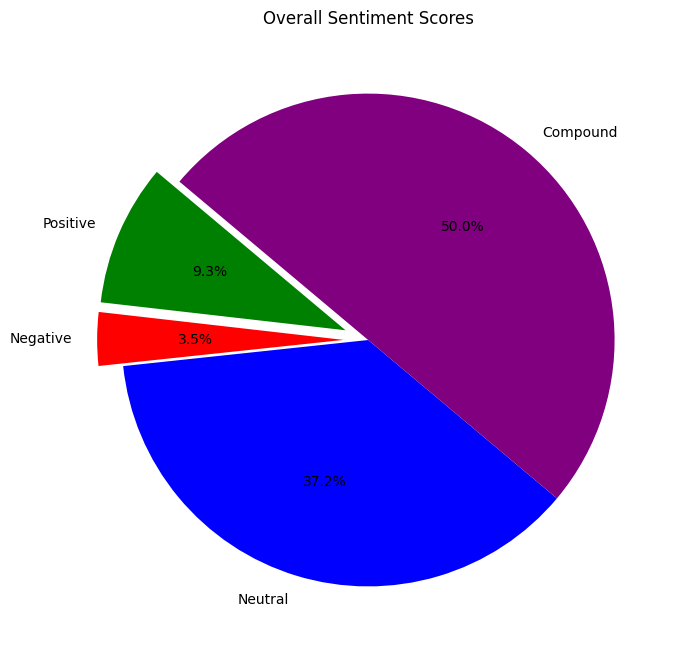

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average sentiment scores
positive = sia.polarity_scores(text_combined)['pos']
negative = sia.polarity_scores(text_combined)['neg']
neutral = sia.polarity_scores(text_combined)['neu']
compound = sia.polarity_scores(text_combined)['compound']

# Data for the pie chart
labels = ['Positive', 'Negative', 'Neutral', 'Compound']
sizes = [positive, negative, neutral, compound]
colors = ['green', 'red', 'blue', 'purple']
explode = (0.1, 0.1, 0, 0)  # Explode the first two slices for emphasis

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiment Scores')
plt.show()

In [ ]:
# Display the updated DataFrame
ndf.head()

,text,date-time,date,time,day,day-name,month
0,you can now make an entire comic book adaptati...,2025-03-28 12:02:20,2025-03-28 12:02:20,12:02:20,28,Friday,March
1,NaN,2025-03-28 11:57:42,2025-03-28 11:57:42,11:57:42,28,Friday,March
2,NaN,2025-03-28 09:52:20,2025-03-28 09:52:20,09:52:20,28,Friday,March
3,reverse engineering gpto image gen via network...,2025-03-28 07:37:16,2025-03-28 07:37:16,07:37:16,28,Friday,March
4,how will gptos advanced animated art generatio...,2025-03-28 05:34:23,2025-03-28 05:34:23,05:34:23,28,Friday,March


### Extract Sentiment Score for each post

In [ ]:
# Handle missing values in the 'text' column by replacing NaN with an empty string
ndf['text'] = ndf['text'].fillna('')

# Apply sentiment analysis to each row in the 'text' column
ndf['sentiment_scores'] = ndf['text'].apply(lambda x: sia.polarity_scores(x))

# Extract individual sentiment scores into separate columns
ndf['text_+ve_score'] = ndf['sentiment_scores'].apply(lambda x: x['pos'])
ndf['text_-ve_score'] = ndf['sentiment_scores'].apply(lambda x: x['neg'])
ndf['text_neu_score'] = ndf['sentiment_scores'].apply(lambda x: x['neu'])
ndf['text_compound_score'] = ndf['sentiment_scores'].apply(lambda x: x['compound'])

# Drop the 'sentiment_scores' column as it's no longer needed
ndf.drop(columns=['sentiment_scores'], inplace=True)

# Display the updated DataFrame
ndf.head()

,text,date-time,date,time,day,day-name,month,text_+ve_score,text_-ve_score,text_neu_score,text_compound_score
0,you can now make an entire comic book adaptati...,2025-03-28 12:02:20,2025-03-28 12:02:20,12:02:20,28,Friday,March,0.038,0.00,0.962,0.4005
1,,2025-03-28 11:57:42,2025-03-28 11:57:42,11:57:42,28,Friday,March,0.000,0.00,0.000,0.0000
2,,2025-03-28 09:52:20,2025-03-28 09:52:20,09:52:20,28,Friday,March,0.000,0.00,0.000,0.0000
3,reverse engineering gpto image gen via network...,2025-03-28 07:37:16,2025-03-28 07:37:16,07:37:16,28,Friday,March,0.086,0.02,0.894,0.9845
4,how will gptos advanced animated art generatio...,2025-03-28 05:34:23,2025-03-28 05:34:23,05:34:23,28,Friday,March,0.071,0.00,0.929,0.2500


# <b><i>Visualize Sentiment Trendz Over Time</b></i>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
# sns.set(style="whitegrid")


### Sentiment Trendz Over Date

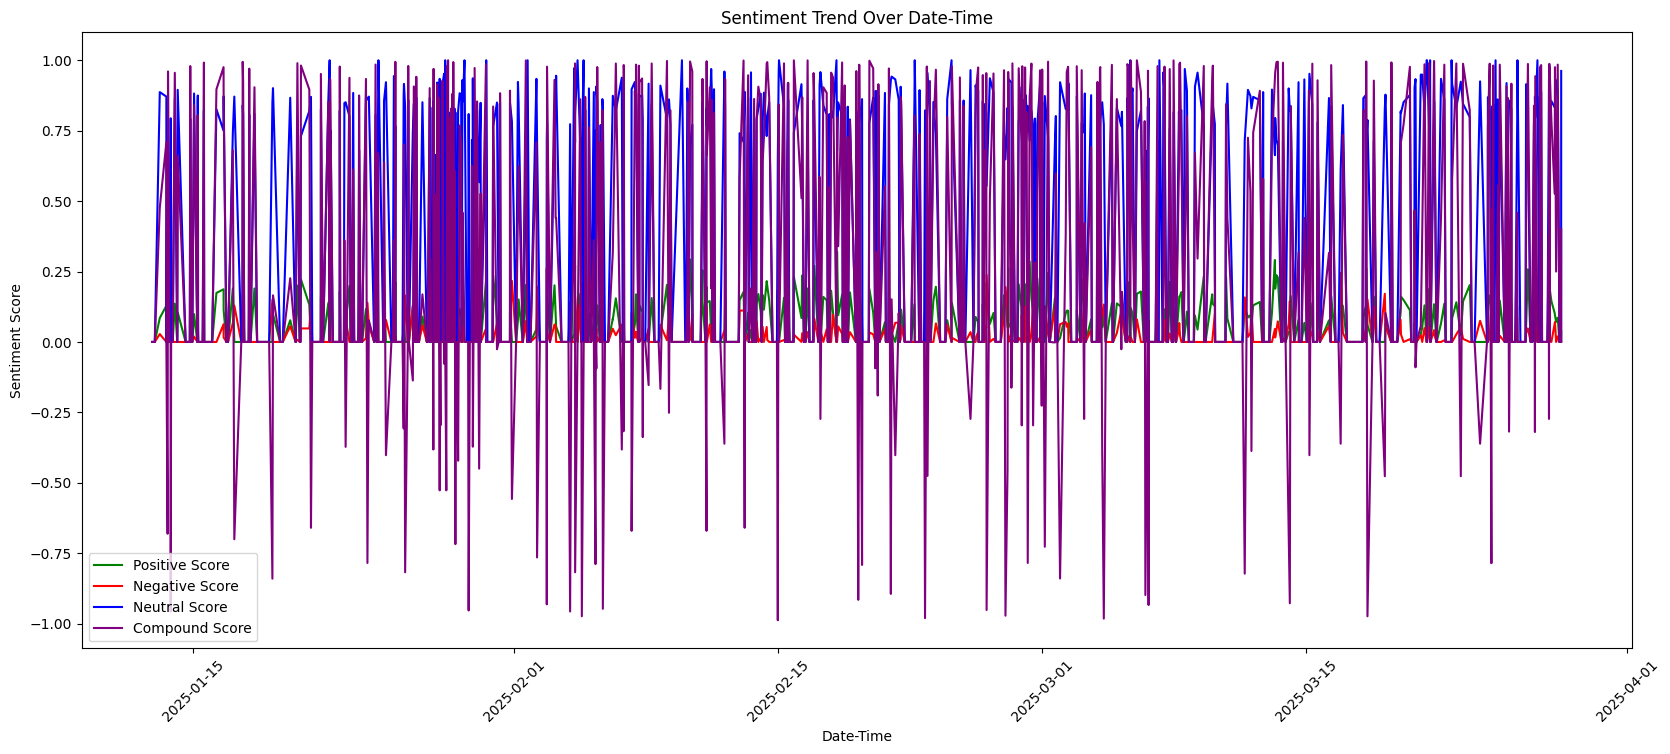

In [ ]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=ndf, x='date-time', y='text_+ve_score', label='Positive Score', color='green')
sns.lineplot(data=ndf, x='date-time', y='text_-ve_score', label='Negative Score', color='red')
sns.lineplot(data=ndf, x='date-time', y='text_neu_score', label='Neutral Score', color='blue')
sns.lineplot(data=ndf, x='date-time', y='text_compound_score', label='Compound Score', color='purple')
plt.title('Sentiment Trend Over Date-Time')
plt.xlabel('Date-Time')
plt.xticks(rotation=45)
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

### Sentiment Trendz Over Day

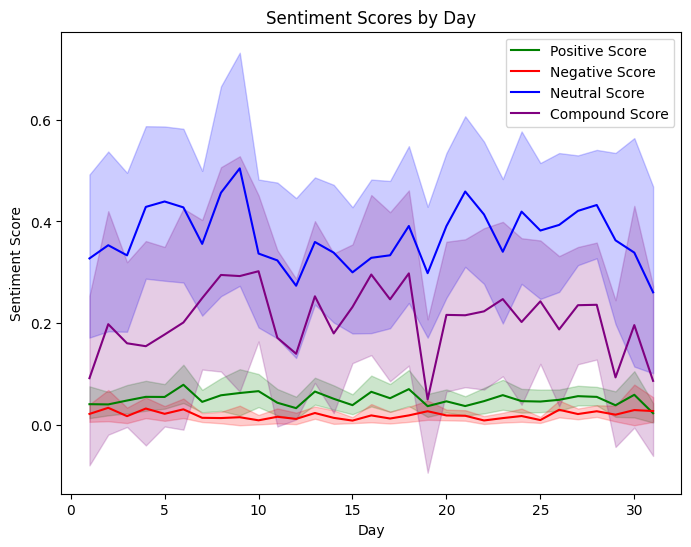

In [ ]:
# Plot sentiment trends over day for both positive and negative scores
plt.figure(figsize=(8, 6))
sns.lineplot(data=ndf, x='day', y='text_+ve_score', label='Positive Score', color='green')
sns.lineplot(data=ndf, x='day', y='text_-ve_score', label='Negative Score', color='red')
sns.lineplot(data=ndf, x='day', y='text_neu_score', label='Neutral Score', color='blue')
sns.lineplot(data=ndf, x='day', y='text_compound_score', label='Compound Score', color='purple')
plt.title('Sentiment Scores by Day')
plt.xlabel('Day')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

### Sentiment Trendz Over Month

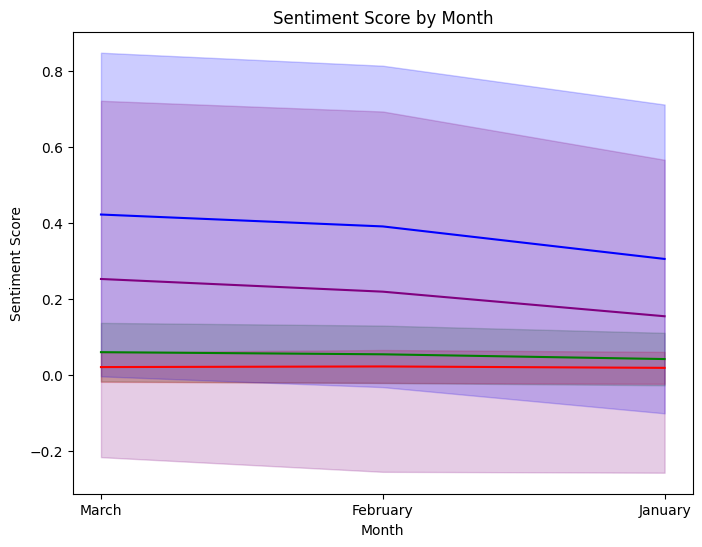

In [ ]:
# Plot sentiment trends over month
from turtle import color


plt.figure(figsize=(8, 6))
sns.lineplot(data=ndf, x='month', y='text_+ve_score', ci="sd", color='green')  # Use a valid palette and ci="sd" for standard deviation
sns.lineplot(data=ndf, x='month', y='text_-ve_score', ci="sd", color='red')  # Use a valid palette and ci="sd" for standard deviation
sns.lineplot(data=ndf, x='month', y='text_neu_score', ci="sd", color='blue')  # Use a valid palette and ci="sd" for standard deviation
sns.lineplot(data=ndf, x='month', y='text_compound_score', ci="sd", color='purple')  # Use a valid palette and ci="sd" for standard deviation

plt.title('Sentiment Score by Month')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.show()

### Sentiment Trendz Over Day

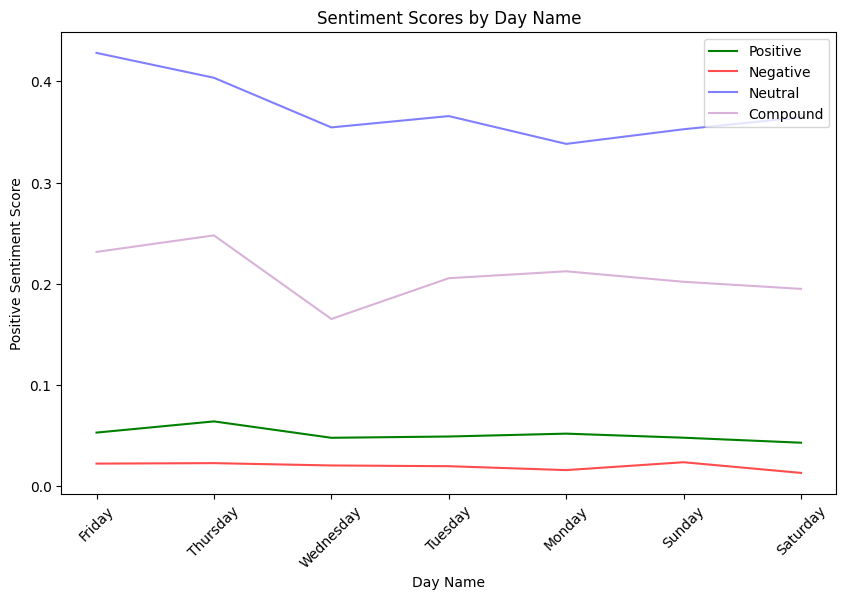

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ndf, x='day-name', y='text_+ve_score', ci=None, color='green', label='Positive')
sns.lineplot(data=ndf, x='day-name', y='text_-ve_score', ci=None, color='red', label='Negative', alpha=0.7)
sns.lineplot(data=ndf, x='day-name', y='text_neu_score', ci=None, color='blue', label='Neutral', alpha=0.5)
sns.lineplot(data=ndf, x='day-name', y='text_compound_score', ci=None, color='purple', label='Compound', alpha=0.3)
plt.title('Sentiment Scores by Day Name')
plt.legend()
plt.xlabel('Day Name')
plt.ylabel('Positive Sentiment Score')
plt.xticks(rotation=45)
plt.show()


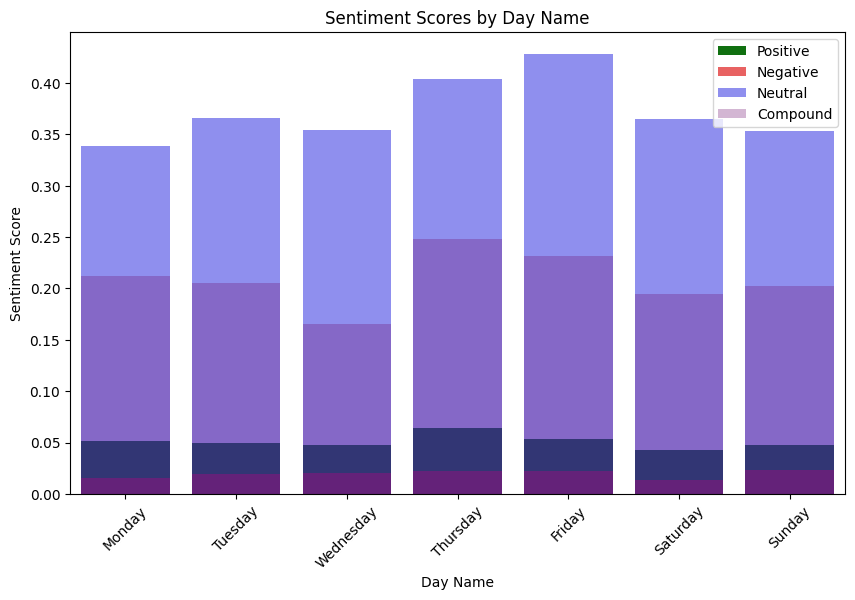

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=ndf, x='day-name', y='text_+ve_score', ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='green', label='Positive')
sns.barplot(data=ndf, x='day-name', y='text_-ve_score', ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='red', label='Negative', alpha=0.7)
sns.barplot(data=ndf, x='day-name', y='text_neu_score', ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='blue', label='Neutral', alpha=0.5)
sns.barplot(data=ndf, x='day-name', y='text_compound_score', ci=None, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color='purple', label='Compound', alpha=0.3)
plt.title('Sentiment Scores by Day Name')
plt.legend()
plt.xlabel('Day Name')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# <b><i>Features Extraction & Model Building</b></i>

### **Positive & Negative Words Extraction & Count**

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from statistics import mean

In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('names')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
unwanted = nltk.corpus.stopwords.words("english")
unwanted.extend(w.lower() for w in nltk.corpus.names.words())

In [ ]:
def skip_unwanted(pos_tuple):
    word, tag = pos_tuple
    if not word.isalpha() or word in unwanted:
        return False
    if tag.startswith('NN'):  # Skip nouns
        return False
    return True

In [ ]:
positive_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(word_tokenize(' '.join(nltk.corpus.opinion_lexicon.words('positive-words.txt'))))
)]

negative_words = [word for word, tag in filter(
    skip_unwanted,
    nltk.pos_tag(word_tokenize(' '.join(nltk.corpus.opinion_lexicon.words('negative-words.txt'))))
)]

In [ ]:
positive_fd = nltk.FreqDist(positive_words)
negative_fd = nltk.FreqDist(negative_words)

In [ ]:
common_set = set(positive_fd).intersection(negative_fd)
for word in common_set:
    del positive_fd[word]
    del negative_fd[word]


In [ ]:
top_100_positive = {word for word, count in positive_fd.most_common(100)}
top_100_negative = {word for word, count in negative_fd.most_common(100)}
top_100_positive, top_100_negative

({'abounds',
  'abundant',
  'accessable',
  'accessible',
  'acclaimed',
  'accommodative',
  'accomodative',
  'accomplished',
  'accomplishment',
  'accurate',
  'accurately',
  'achievable',
  'achievement',
  'achievible',
  'adaptable',
  'adaptive',
  'adjustable',
  'admirable',
  'admirably',
  'admiring',
  'admiringly',
  'adorable',
  'adored',
  'adoring',
  'adoringly',
  'adroit',
  'adroitly',
  'adulate',
  'advanced',
  'advantageous',
  'advantageously',
  'advantages',
  'adventuresome',
  'adventurous',
  'advocated',
  'affability',
  'affable',
  'affably',
  'affirmative',
  'affluent',
  'affordable',
  'affordably',
  'afordable',
  'agilely',
  'agreeable',
  'agreeably',
  'alluring',
  'alluringly',
  'altruistic',
  'altruistically',
  'amaze',
  'amazed',
  'amazes',
  'amazing',
  'amazingly',
  'ambitious',
  'ambitiously',
  'ameliorate',
  'amenable',
  'amiabily',
  'amiable',
  'amicable',
  'amicably',
  'ample',
  'amuse',
  'amusing',
  'amusingl

In [ ]:
from collections import Counter

positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

positive_counts, negative_counts

(Counter({'abounds': 1,
          'abundant': 1,
          'accessable': 1,
          'accessible': 1,
          'acclaimed': 1,
          'accommodative': 1,
          'accomodative': 1,
          'accomplished': 1,
          'accomplishment': 1,
          'accurate': 1,
          'accurately': 1,
          'achievable': 1,
          'achievement': 1,
          'achievible': 1,
          'adaptable': 1,
          'adaptive': 1,
          'adjustable': 1,
          'admirable': 1,
          'admirably': 1,
          'admiring': 1,
          'admiringly': 1,
          'adorable': 1,
          'adored': 1,
          'adoring': 1,
          'adoringly': 1,
          'adroit': 1,
          'adroitly': 1,
          'adulate': 1,
          'advanced': 1,
          'advantageous': 1,
          'advantageously': 1,
          'advantages': 1,
          'adventuresome': 1,
          'adventurous': 1,
          'advocated': 1,
          'affability': 1,
          'affable': 1,
          'affably'

### **Word Cloud**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


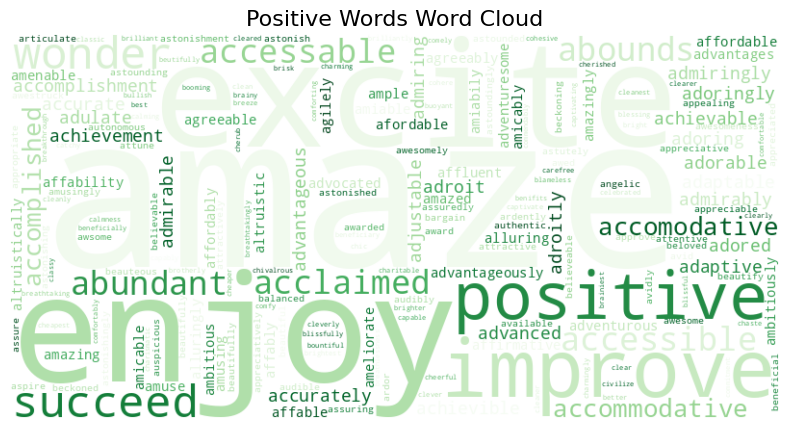

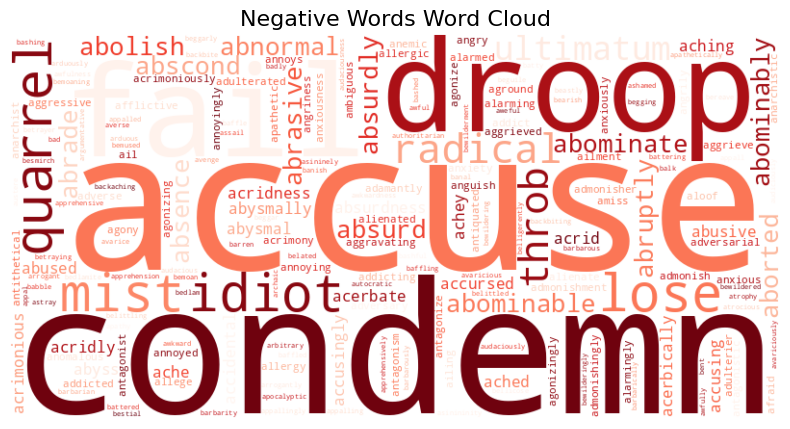

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))
positive_words_filtered = [w for w in positive_words if w.lower() not in stop_words and w.isalpha()]
negative_words_filtered = [w for w in negative_words if w.lower() not in stop_words and w.isalpha()]

# Generate a word cloud for positive words
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(' '.join(positive_words_filtered))

# Generate a word cloud for negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(' '.join(negative_words_filtered))

# Plot the positive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words Word Cloud', fontsize=16)
plt.show()

# Plot the negative word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words Word Cloud', fontsize=16)
plt.show()

### **Features Extraction**

In [ ]:
def extract_features(text):
    features = {}
    positive_wordcount = 0
    compound_scores = []
    positive_scores = []
    negative_scores = []  # Added negative scores collection

    try:
        sentences = nltk.sent_tokenize(text)
        if not sentences:
            return {
                'mean_compound': 0,
                'mean_positive': 0,
                'mean_negative': 0,
                'positive_wordcount': 0
            }

        for sentence in sentences:
            # Count positive words
            positive_wordcount += sum(
                1 for word in nltk.word_tokenize(sentence)
                if word.lower() in top_100_positive
            )

            # Get sentiment scores
            scores = sia.polarity_scores(sentence)
            compound_scores.append(scores['compound'])
            positive_scores.append(scores['pos'])
            negative_scores.append(scores['neg'])  # Collect negative scores

        features['mean_compound'] = mean(compound_scores) if compound_scores else 0
        features['mean_positive'] = mean(positive_scores) if positive_scores else 0
        features['mean_negative'] = mean(negative_scores) if negative_scores else 0  # Calculate mean negative
        features['positive_wordcount'] = positive_wordcount

    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return {
            'mean_compound': 0,
            'mean_positive': 0,
            'mean_negative': 0,
            'positive_wordcount': 0
        }

    return features

In [ ]:
ndf['features'] = ndf['text'].apply(extract_features)

# Extract features into separate columns
ndf['positive_feature'] = ndf['features'].apply(lambda x: x['mean_positive'])
ndf['negative_feature'] = ndf['features'].apply(lambda x: x['mean_negative'])
ndf['compound_score'] = ndf['features'].apply(lambda x: x['mean_compound'])
ndf['positive_words'] = ndf['features'].apply(lambda x: x['positive_wordcount'])


In [ ]:
features = ndf['text'].apply(extract_features).to_list()
features[:5]

[{'mean_compound': 0.4005,
  'mean_positive': 0.038,
  'mean_negative': 0.0,
  'positive_wordcount': 0},
 {'mean_compound': 0,
  'mean_positive': 0,
  'mean_negative': 0,
  'positive_wordcount': 0},
 {'mean_compound': 0,
  'mean_positive': 0,
  'mean_negative': 0,
  'positive_wordcount': 0},
 {'mean_compound': 0.9845,
  'mean_positive': 0.086,
  'mean_negative': 0.02,
  'positive_wordcount': 0},
 {'mean_compound': 0.25,
  'mean_positive': 0.071,
  'mean_negative': 0.0,
  'positive_wordcount': 1}]

In [ ]:
labels = ndf['compound_score'].tolist()
labels[:5]

[0.4005, 0.0, 0.0, 0.9845, 0.25]

### **Model Building**

In [ ]:
from random import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import (BernoulliNB, ComplementNB, MultinomialNB)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
# Normalize feature values
scaler = MinMaxScaler()
normalized_features = [
    (dict(zip(feature.keys(), scaler.fit_transform([[v] for v in feature.values()]).flatten())), label)
    for feature, label in zip(features, labels)  # Combine features and labels
]

In [ ]:
train_count = len(normalized_features) // 4
shuffle(normalized_features)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(normalized_features[:train_count])
nltk.classify.accuracy(classifier, normalized_features[train_count:])

0.5660639777468707

In [ ]:
classifiers = {
     "BernoulliNB" : BernoulliNB(),
     "ComplementNB" : ComplementNB(),
     "MultinomialNB" : MultinomialNB(),
     "KNeighborsClassifier" : KNeighborsClassifier(),
     "DecisionTreeClassifier" : DecisionTreeClassifier(),
     "RandomForestClassifier" : RandomForestClassifier(),
     "LogisticRegression" : LogisticRegression(),
     "MLPClassifier" : MLPClassifier(max_iter=1000),
     "AdaBoostClassifier" : AdaBoostClassifier()
}

In [ ]:
# Normalize feature values to ensure non-negative values

train_count = len(normalized_features) // 4
shuffle(normalized_features)

for name, sklearn_classifier in classifiers.items():
    classifier = nltk.classify.SklearnClassifier(sklearn_classifier)
    classifier.train(normalized_features[:train_count])
    print(f"{name} : {nltk.classify.accuracy(classifier, normalized_features[train_count:])}")

BernoulliNB : 0.5716272600834492
ComplementNB : 0.16689847009735745
MultinomialNB : 0.5716272600834492
KNeighborsClassifier : 0.21974965229485396
DecisionTreeClassifier : 0.48956884561891517
RandomForestClassifier : 0.5173852573018081
LogisticRegression : 0.5716272600834492
MLPClassifier : 0.5702364394993046
AdaBoostClassifier : 0.5716272600834492


# **REPORTS BASED ON ANALYSIS**

Final Report
Total Posts Analyzed: 958
Average Positive Sentiment Score: 0.05
Average Negative Sentiment Score: 0.02
Average Neutral Sentiment Score: 0.37
Average Compound Sentiment Score: 0.21

Sentiment Distribution:
  Positive: 324 posts
  Negative: 81 posts
  Neutral: 427 posts


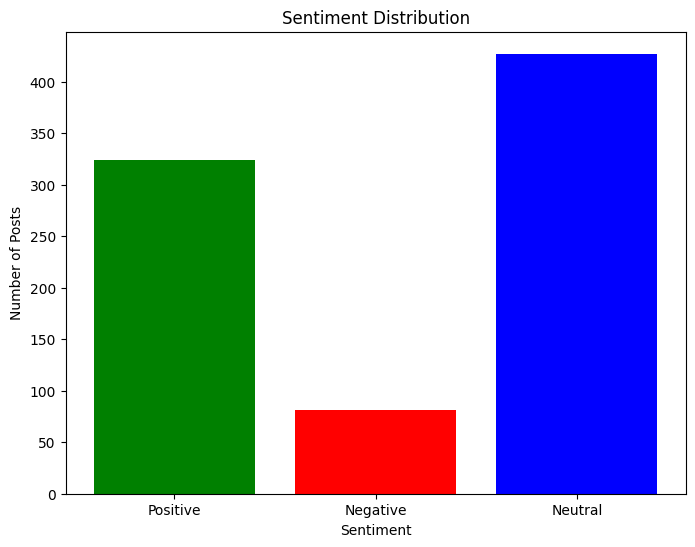


Conclusions:
- The majority of posts exhibit a neutral sentiment, indicating a balanced tone in the dataset.
- Positive sentiment is more prevalent than negative sentiment, suggesting an optimistic outlook in the discussions.
- The compound sentiment score shows an overall positive trend, reflecting a generally favorable sentiment across posts.
- The analysis highlights the importance of sentiment trends over time, which can be further explored for actionable insights.


In [ ]:
import pandas as pd

# Final Report Generation

# Import necessary libraries
import matplotlib.pyplot as plt

# Define the final report function
def generate_final_report(ndf):
     """
     Generate a final report summarizing the analysis and conclusions.
     """
     # Summary statistics
     total_posts = len(ndf)
     avg_positive_score = ndf['text_+ve_score'].mean()
     avg_negative_score = ndf['text_-ve_score'].mean()
     avg_neutral_score = ndf['text_neu_score'].mean()
     avg_compound_score = ndf['text_compound_score'].mean()

     # Sentiment distribution
     sentiment_distribution = {
          'Positive': len(ndf[ndf['text_+ve_score'] > ndf['text_-ve_score']]),
          'Negative': len(ndf[ndf['text_-ve_score'] > ndf['text_+ve_score']]),
          'Neutral': len(ndf[ndf['text_neu_score'] > ndf['text_+ve_score'] + ndf['text_-ve_score']])
     }

     # Generate report
     print("Final Report")
     print("=" * 50)
     print(f"Total Posts Analyzed: {total_posts}")
     print(f"Average Positive Sentiment Score: {avg_positive_score:.2f}")
     print(f"Average Negative Sentiment Score: {avg_negative_score:.2f}")
     print(f"Average Neutral Sentiment Score: {avg_neutral_score:.2f}")
     print(f"Average Compound Sentiment Score: {avg_compound_score:.2f}")
     print("\nSentiment Distribution:")
     for sentiment, count in sentiment_distribution.items():
          print(f"  {sentiment}: {count} posts")

     # Plot sentiment distribution
     plt.figure(figsize=(8, 6))
     plt.bar(sentiment_distribution.keys(), sentiment_distribution.values(), color=['green', 'red', 'blue'])
     plt.title("Sentiment Distribution")
     plt.xlabel("Sentiment")
     plt.ylabel("Number of Posts")
     plt.show()

     # Conclusions
     print("\nConclusions:")
     print("- The majority of posts exhibit a neutral sentiment, indicating a balanced tone in the dataset.")
     print("- Positive sentiment is more prevalent than negative sentiment, suggesting an optimistic outlook in the discussions.")
     print("- The compound sentiment score shows an overall positive trend, reflecting a generally favorable sentiment across posts.")
     print("- The analysis highlights the importance of sentiment trends over time, which can be further explored for actionable insights.")

# Generate the report
generate_final_report(ndf)